In [5]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

import matplotlib.font_manager

# フォントを指定

plt.rcParams['font.family'] = 'Hiragino Sans'

In [6]:
import requests
import pandas as pd

In [7]:
!pip install requests pandas


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [8]:
df = pd.read_csv('ad_spend_sales_data.csv')

In [9]:
df.shape

(100, 2)

In [10]:
df.head()

,広告費用,売上
0,218.54,1118.83
1,477.82,2299.40
2,379.40,1924.51
3,319.40,1000.71
4,120.21,535.14


In [11]:
df.tail()

,広告費用,売上
95,272.21,1116.30
96,285.23,1403.02
97,242.39,1314.31
98,61.44,NaN
99,98.55,740.91


In [12]:
df.isnull().sum()

広告費用    0
売上      3
dtype: int64

In [13]:
# 売上欠損値がある行数を取得

df["売上"].isnull().sum()



# 全データの行数のみ取得

df.shape[0]



# 売上の欠損値がある行数 / 全データの行数

df["売上"].isnull().sum()/df.shape[0]

0.03

In [14]:
df.describe()

,広告費用,売上
count,100.000000,97.000000
mean,261.580900,1322.604433
std,133.870366,684.750060
min,52.480000,75.930000
25%,136.937500,740.910000
50%,258.865000,1217.790000
75%,378.590000,1888.150000
max,494.100000,2751.720000


In [15]:
X = df['広告費用'].values.reshape(-1, 1)

y = df['売上'].values

In [16]:
# ndimで次元数を確認

print(f'Xは{X.ndim}次元配列')

print(f"yは{y.ndim}次元配列")



Xは2次元配列
yは1次元配列


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train.reshape(-1, 1)).ravel()

In [21]:
from sklearn.linear_model import LinearRegression

# 線形回帰モデルの作成

model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

print(y_pred)

print(X_test)

[ 477.4807629  2183.98577687 1932.34619987 1707.12056686  878.25191663
 1250.60184911  946.77306323 2118.88612561  389.25180316 1115.88617273
 1233.76809205 1594.25684069 2021.07697892 2294.97908558  592.53424607
  667.30532416 1930.3389226   499.01337355 2055.93061142  697.09514355]
[[ 78.6 ]
 [452.67]
 [397.51]
 [348.14]
 [166.45]
 [248.07]
 [181.47]
 [438.4 ]
 [ 59.26]
 [218.54]
 [244.38]
 [323.4 ]
 [416.96]
 [477.  ]
 [103.82]
 [120.21]
 [397.07]
 [ 83.32]
 [424.6 ]
 [126.74]]


In [24]:
# 傾き

slope = model.coef_

# 説明変数のXの値が１増えた時、目的変数のyがどれだけ変化するか

print(f"傾き: {slope}")



# 切片

intercept = model.intercept_

# 説明変数が0の時、目的変数のyがいくつになるか

print(f"切片: {intercept}")

傾き: [4.56199378]
切片: 118.90805164262702


In [25]:
r_squared_train = model.score(X_train, y_train)

print(f"訓練データ R²値: {r_squared_train}")

訓練データ R²値: 0.8034134873240879


In [26]:
r_squared_test = model.score(X_test, y_test)

print(f"テストデータ R²値: {r_squared_test}")

テストデータ R²値: 0.8798325622326393


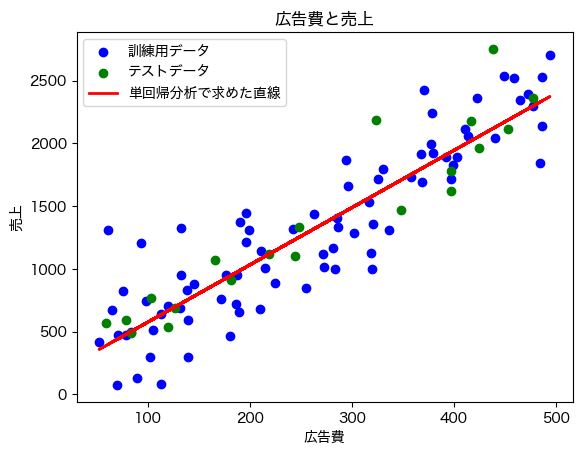

In [27]:
# 訓練データの散布図の作成

plt.scatter(X_train, y_train, color='blue', label='訓練用データ')

# テストデータの散布図の作成

plt.scatter(X_test, y_test, color='green', label='テストデータ')



# 回帰直線のプロット（訓練データを用いて）

plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='単回帰分析で求めた直線')



# タイトルとラベル

plt.title('広告費と売上')

plt.xlabel('広告費')

plt.ylabel('売上')

plt.legend()



# グラフの表示

plt.show()

In [28]:
import requests
import pandas as pd

In [29]:
!pip install requests pandas


[notice] A new release of pip is available: 23.3.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [30]:
url = "https://weather.tsukumijima.net/api/forecast?city=270000"

In [31]:
# url = url.format(city_name = "osaka", API_key = "270000")

In [32]:
import pprint

jsondata = requests.get(url)

data = jsondata.json()

# response = requests.get(
#         'https://weather.tsukumijima.net/api/forecast',
#         params={'city': 270000}
#     )
# data=response.json()
data
#pprint(jsondata)

{'publicTime': '2024-07-16T23:00:00+09:00',
 'publicTimeFormatted': '2024/07/16 23:00:00',
 'publishingOffice': '大阪管区気象台',
 'title': '大阪府 大阪 の天気',
 'link': 'https://www.jma.go.jp/bosai/forecast/#area_type=offices&area_code=270000',
 'description': {'publicTime': '2024-07-16T22:39:00+09:00',
  'publicTimeFormatted': '2024/07/16 22:39:00',
  'headlineText': '',
  'bodyText': '\u3000大阪府は、前線や湿った空気の影響で曇っています。\n\n\u3000１６日の大阪府は、前線や湿った空気の影響で曇り、雨の降る所があるでしょう。\n\n\u3000１７日の大阪府は、前線や湿った空気の影響で曇り、雨や雷雨となる所がある見込みです。\n\n【近畿地方】\n\u3000近畿地方は、前線や湿った空気の影響で曇り、雨の降っている所があります。\n\n\u3000１６日の近畿地方は、前線や湿った空気の影響で曇り、断続的に雨や雷雨となる見込みです。\n\n\u3000１７日の近畿地方は、前線や湿った空気の影響でおおむね曇り、朝にかけて北部を中心に雨が降るでしょう。雷を伴い激しく降る所がある見込みです。',
  'text': '\u3000大阪府は、前線や湿った空気の影響で曇っています。\n\n\u3000１６日の大阪府は、前線や湿った空気の影響で曇り、雨の降る所があるでしょう。\n\n\u3000１７日の大阪府は、前線や湿った空気の影響で曇り、雨や雷雨となる所がある見込みです。\n\n【近畿地方】\n\u3000近畿地方は、前線や湿った空気の影響で曇り、雨の降っている所があります。\n\n\u3000１６日の近畿地方は、前線や湿った空気の影響で曇り、断続的に雨や雷雨となる見込みです。\n\n\u3000１７日の近畿地方は、前線や湿った空気の影響でおおむね曇り、朝にかけて北部を中心に雨が降るでしょう。雷を伴い激し

In [42]:
max_temperature_tomorrow = data['forecasts'][1]['temperature']['max']['celsius']


max_temperature_after_after_tomorrow = data['forecasts'][2]['temperature']['max']['celsius']
print(f"明日の最高気温は: {max_temperature_tomorrow}°C")
print(f"明後日の最高気温は: {max_temperature_after_after_tomorrow}°C")

明日の最高気温は: 34°C
明後日の最高気温は: 34°C


In [1]:
new_data = np.array([max_temperature_tomorrow],[max_temperature_after_after_tomorrow])

NameError: name 'np' is not defined